# Fine-tuning a pre-trained BERT model with MLM

In this notebook, we will walk through the process of fine-tuning a pre-trained BERT model on a medical text dataset using masked language modeling (MLM), a popular technique for training BERT models on a range of natural language processing (NLP) tasks.

We will start by loading and preprocessing the medical text dataset using the Pandas and NLTK libraries. Next, we will use the Hugging Face Transformers library to load a pre-trained BERT model and tokenizer, and encode the preprocessed data for input to the model. We will then use masked language modeling to randomly mask a subset of the input tokens during each training epoch, which helps the model to learn more effectively from the input data.

Finally, we will set up the fine-tuning process using PyTorch's data loading utilities and the Hugging Face Trainer class, and train the model on the preprocessed medical text data. We will save the fine-tuned model for later use.

## Huggingface model repository

The [Hugging Face model repository](https://huggingface.co/) is a collection of pre-trained models for natural language processing (NLP) tasks, including language modeling, text classification, and named entity recognition. It is maintained by the Hugging Face company, which specializes in developing open-source software for NLP and machine learning.

The repository includes a wide range of pre-trained models, including popular models like BERT, GPT-2, and RoBERTa, as well as many other models for specific NLP tasks and languages. The models are typically pre-trained on large amounts of text data using unsupervised learning techniques, and can be fine-tuned on specific NLP tasks using transfer learning.

The models are available for download and use in a variety of formats, including TensorFlow, PyTorch, and ONNX, and can be easily integrated with other NLP tools and libraries. The Hugging Face model repository is a valuable resource for NLP practitioners, researchers, and enthusiasts looking to build powerful and effective NLP models.

## BERT

BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained deep learning model for natural language processing (NLP) tasks, developed by researchers at Google. BERT is based on the transformer architecture, which is a deep neural network architecture that has been shown to be effective at capturing long-range dependencies in sequences of data, such as text.

One of the key features of BERT is its ability to pre-train on large amounts of text data using unsupervised learning techniques, which allows it to learn a rich representation of natural language that can be fine-tuned on a wide range of NLP tasks. During pre-training, BERT is trained on a masked language modeling task, where it is tasked with predicting the masked tokens in a given sequence of text.  This process allows BERT to learn to effectively represent the context of each word in a sentence, and to capture complex relationships between words in a text.

BERT tokenization is the process of converting raw text data into numerical sequences that can be input to the BERT model. BERT uses a subword tokenization approach called WordPiece, which is similar to byte-pair encoding (BPE). The WordPiece tokenizer breaks words down into subword units, which can include full words, prefixes, or suffixes. The tokenizer then assigns each subword a unique token ID, which is used to represent the subword in the input sequence.

After pre-training, BERT can be fine-tuned on specific NLP tasks, such as text classification, question-answering, and named entity recognition, using transfer learning. This fine-tuning process involves training the model on a smaller labeled dataset for a specific task, which allows the model to adapt its pre-trained weights to the specific task and achieve state-of-the-art performance.

Overall, BERT is a powerful and versatile NLP model that has been shown to achieve state-of-the-art performance on a wide range of NLP tasks, and is widely used in industry and academia for various NLP applications.

## Reserved tokens

BERT uses several reserved tokens that have special meanings and are used during tokenization and input encoding. These reserved tokens include:

1. ``[CLS]``: This token is added to the beginning of each input sequence and is used to represent the start of a 1.sentence.
1. ``[SEP]``: This token is used to separate sentences or segments of text within an input sequence.
1. ``[MASK]``: This token is used to replace a randomly selected subset of tokens in the input sequence during masked 1.language modeling.
1. ``[PAD]``: This token is used to pad the input sequence to ensure that all sequences have the same length.
1. ``[UNK]``: This token is used to represent out-of-vocabulary (OOV) words that are not present in the vocabulary used 1.during tokenization.
1. ``[unused0]`` to ``[unused99]``: These tokens are reserved for custom use and can be used by researchers or developers to encode special information or custom features in the input sequence.

These reserved tokens are an important part of BERT's input encoding scheme and help to ensure that the model is able to effectively process and learn from input sequences of varying lengths and structures.

## Loading the data

### Note on preprocessing and pre-trained models

When using a pre-trained Huggingface BERT model, you typically do not need to perform extensive preprocessing of the input text. This is because the model's pre-trained tokenizer has already been trained on large amounts of text data and has learned to tokenize and normalize text effectively.

However, there are still some basic preprocessing steps you may want to perform, such as lowercasing the text and removing any special characters or symbols that may cause issues with the tokenizer. These steps can help ensure that the text is processed efficiently by the tokenizer and that the resulting token sequences are meaningful to the model.

In addition to basic preprocessing, you may also want to adjust the maximum sequence length parameter of the tokenizer to ensure that your input text is appropriately truncated or padded to match the requirements of the model.

__Overall, the amount of preprocessing required for using a pre-trained Huggingface BERT model is generally minimal, and you should focus more on fine-tuning the model on your specific task and optimizing hyperparameters to achieve the best performance.__

For now, we will use our preprocessed data. 

First, we load the preprocessed data into our Jupyter notebook using Pandas. We have two datasets: one for training and one for validation. Both datasets are stored as CSV files, and we use the pd.read_csv() function to load them into data frames. The index_col=0 parameter specifies that the first column of the CSV file should be used as the index of the data frame.

In [2]:
import pandas as pd

df_train = pd.read_csv("../../data/train.csv", index_col=0)
df_validation = pd.read_csv("../../data/validation.csv", index_col=0)


## Loading the model and tokenizer

In the next step, we load the pre-trained BERT model and tokenizer using the Hugging Face Transformers library. We use the BertTokenizer.from_pretrained() function to load the pre-trained tokenizer, which has been trained on a large corpus of text data and is capable of encoding text into numerical sequences that the BERT model can understand.

Next, we use the BertForMaskedLM.from_pretrained() function to load the pre-trained BERT model for masked language modeling. This model has been trained to predict the masked words in a given text sequence, which makes it well-suited for a range of NLP tasks, including text generation and sentiment analysis.

By using a pre-trained model and tokenizer, we can take advantage of the model's prior knowledge of natural language and reduce the amount of time and effort required to train an effective NLP model from scratch. Once the model and tokenizer are loaded, we can start fine-tuning the BERT model on our preprocessed medical text data.

In [3]:
from transformers import BertTokenizer, BertForMaskedLM

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMaskedLM.from_pretrained("bert-base-uncased")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Creating the input data

Now that we have our data, tokenizer and model, its time to prepare the data for our task of masked language modelling.

We use the pre-trained tokenizer to encode the preprocessed medical text data into numerical sequences that can be input to the BERT model. We use the `tokenizer` to tokenize the text data and convert it into PyTorch tensors that the BERT model can process. Here's a brief description of each argument:
- `return_tensors="pt"`: the function should return PyTorch tensors instead of regular Python lists or arrays
- `max_length=512`: specifies the maximum length of the encoded sequences
- `truncation=True`: any sequences longer than the maximum length should be truncated
- `padding="max_length"`: add padding tokens to the end of each sequence to make sure that all the sequences have the same length


In [4]:
x_train = tokenizer(
    df_train["transcription"].values.tolist(),
    return_tensors="pt",
    max_length=512,
    truncation=True,
    padding="max_length",
)


dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])

Next we create a ``labels`` tensor by cloning the ``input_ids`` tensor, which contains the encoded sequence data. This tensor will be used to train the BERT model to predict the masked tokens in the input sequences.

In [ ]:
x_train["labels"] = x_train.input_ids.detach().clone()


Then we generate a mask array to be used during the fine-tuning process. The mask array is used to randomly mask a certain percentage of the input tokens during each training epoch - hence the name masked language modelling.

The masking tensor is created by performing element-wise multiplication on several conditions. The first condition, ``(rand < mask_probability)``, randomly selects a certain percentage of the tokens to be masked. The following conditions exclude masking of special reserved tokens.

In [11]:
import torch

mask_propability = 0.15
rand = torch.rand(x_train.input_ids.shape)
mask_arr = (
    (rand < mask_propability)
    * (x_train.input_ids != 101)  # Don't mask CLS
    * (x_train.input_ids != 102)  # Don't mask SEP
    * (x_train.input_ids != 0)  # Dont' mask PAD
)


Let's visualize the masking array to better understand what happens above.

<Axes: >

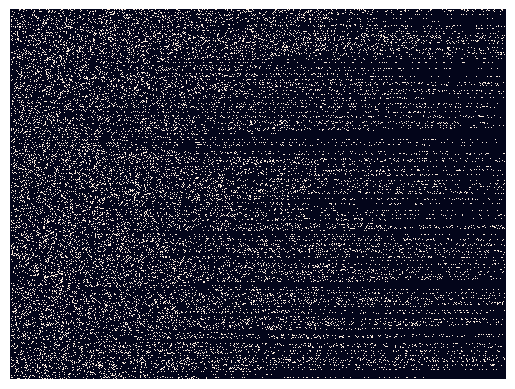

In [6]:
import seaborn as sns

sns.heatmap(mask_arr.numpy(), cbar=False, xticklabels=[], yticklabels=[])


Each line of pixels corresponds to a sequence in the mask. White pixels indicate tokens that are to be masked. Black pixels indicate tokens that are to be left unmasked. 

By excluding these tokens from being masked, we ensure that the model does not learn to predict these special tokens, which could negatively impact the performance of the model. Once the mask array is generated, it can be used during the fine-tuning process to randomly mask input tokens during each training epoch.

Next, we apply the mask array to the input sequence data in ``x_train`` by replacing a randomly selected subset of tokens with the ``[MASK]`` token. This is a common technique used in masked language modeling to train the BERT model to predict the masked tokens.

In [14]:
for i in range(x_train.input_ids.shape[0]):
    x_train.input_ids[i, torch.flatten(mask_arr[i].nonzero()).tolist()] = 103  # MASK


By randomly masking a subset of the input tokens during each training epoch, the BERT model is forced to learn to predict the masked tokens based on the context of the surrounding tokens, rather than simply memorizing the input sequence. This helps to improve the generalization performance of the model and make it more effective at a range of NLP tasks.

## Fine-tuning the pre-trained model

The last step is then to fine-tune the pre-trained BERT model with our transcription data.

First, we define a custom ``TranscriptionDataset`` class that can be used to load and preprocess the input sequence data for the BERT model during the fine-tuning process. By defining a custom dataset class, we can easily load and preprocess the input sequence data during the fine-tuning process and integrate it with PyTorch's data loading utilities.

In [8]:
class TranscriptionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: val[idx].clone().detach() for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)


Finally, we set up the training process for the fine-tuned BERT model using the Hugging Face Transformers library. We start by creating a ``TranscriptionDataset`` object using the ``x_train`` dictionary of encoded sequence data and corresponding labels.

Next, we define the training arguments for the ``Trainer`` object using the ``TrainingArguments`` class. We specify the output directory for the trained model, the batch size for training, and the number of training epochs to run.

Finally, we create a ``Trainer`` object using the pre-trained BERT model, the training arguments, and the ``TranscriptionDataset`` object. We then call the ``train()`` method of the ``Trainer`` object to start the training process, which fine-tunes the BERT model on our preprocessed medical text data.

Once the training is complete, we save the fine-tuned model using the ``save_model()`` method of the ``Trainer`` object, which saves the trained model to the specified output directory. This fine-tuned model can then be used for a range of NLP tasks, including text classification, sentiment analysis, and text generation.

In [9]:
from transformers import TrainingArguments, Trainer

dataset = TranscriptionDataset(x_train)
args = TrainingArguments(
    output_dir="out",
    per_device_train_batch_size=4,
    num_train_epochs=8,
)
trainer = Trainer(model=model, args=args, train_dataset=dataset)
trainer.train()
trainer.save_model(output_dir="../../model/bert-base-uncased-finetuned")


/home/grimfada/miniconda3/envs/transformers-seminar-workshop/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2290
  Num Epochs = 8
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 4584
  Number of trainable parameters = 109514298


Step,Training Loss
500,0.495200
1000,0.293800
1500,0.237200
2000,0.190200
2500,0.161600
3000,0.128800
3500,0.108200
4000,0.090400
4500,0.077800


Saving model checkpoint to out/checkpoint-500
Configuration saved in out/checkpoint-500/config.json
Model weights saved in out/checkpoint-500/pytorch_model.bin
Saving model checkpoint to out/checkpoint-1000
Configuration saved in out/checkpoint-1000/config.json
Model weights saved in out/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to out/checkpoint-1500
Configuration saved in out/checkpoint-1500/config.json
Model weights saved in out/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to out/checkpoint-2000
Saving model checkpoint to out/checkpoint-2000
Configuration saved in out/checkpoint-2000/config.json
Model weights saved in out/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to out/checkpoint-2500
Configuration saved in out/checkpoint-2500/config.json
Model weights saved in out/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to out/checkpoint-3000
Configuration saved in out/checkpoint-3000/config.json
Model weights saved in out/checkpoint-3

TrainOutput(global_step=4584, training_loss=0.19594868201027782, metrics={'train_runtime': 2361.9143, 'train_samples_per_second': 7.756, 'train_steps_per_second': 1.941, 'total_flos': 4821912170496000.0, 'train_loss': 0.19594868201027782, 'epoch': 8.0})